<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Previously" data-toc-modified-id="Previously-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Previously</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Useful functions</a></span><ul class="toc-item"><li><span><a href="#New-scoring" data-toc-modified-id="New-scoring-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>New scoring</a></span></li></ul></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Pre-treatment-of-data" data-toc-modified-id="Pre-treatment-of-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Pre-treatment of data</a></span></li><li><span><a href="#Train-set-&amp;-test-set" data-toc-modified-id="Train-set-&amp;-test-set-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Train set &amp; test set</a></span></li><li><span><a href="#Re-sampling-train-set-with-SMOTE" data-toc-modified-id="Re-sampling-train-set-with-SMOTE-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Re-sampling train set with SMOTE</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Hyperparameters-optimization" data-toc-modified-id="Hyperparameters-optimization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hyperparameters optimization</a></span><ul class="toc-item"><li><span><a href="#GridSearchCV" data-toc-modified-id="GridSearchCV-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>GridSearchCV</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></li><li><span><a href="#LightGBM-Classifier" data-toc-modified-id="LightGBM-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LightGBM Classifier</a></span></li><li><span><a href="#SGD-Classifier" data-toc-modified-id="SGD-Classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SGD Classifier</a></span><ul class="toc-item"><li><span><a href="#Hyperparameters-optimisation" data-toc-modified-id="Hyperparameters-optimisation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Hyperparameters optimisation</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-CV" data-toc-modified-id="Grid-Search-CV-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Grid Search CV</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Optimal-threshold" data-toc-modified-id="Optimal-threshold-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Optimal threshold</a></span><ul class="toc-item"><li><span><a href="#Youden’s-J-statistic." data-toc-modified-id="Youden’s-J-statistic.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Youden’s J statistic.</a></span></li><li><span><a href="#Evaluation-modèle-par-rapport-au-seuil-de-solvabilité" data-toc-modified-id="Evaluation-modèle-par-rapport-au-seuil-de-solvabilité-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Evaluation modèle par rapport au seuil de solvabilité</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature importance</a></span><ul class="toc-item"><li><span><a href="#Global-feature-importance" data-toc-modified-id="Global-feature-importance-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Global feature importance</a></span></li><li><span><a href="#Local-feature-importance" data-toc-modified-id="Local-feature-importance-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Local feature importance</a></span></li></ul></li><li><span><a href="#Classification-pipeline" data-toc-modified-id="Classification-pipeline-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Classification pipeline</a></span></li></ul></div>

## Introduction

In this notebook, development of machine learning classification models will be reported

### Previously

EDA was performed from a Kaggle kernel
Pre-processing was performed from a Kaggle kernel
The best model was selected after some tests in the previous notebook (machine_learning)

### Imports

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
#import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn 
#from sklearn.impute import SimpleImputer
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, roc_auc_score, auc, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.decomposition import PCA

# Imb-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

#SGD Classifier
from sklearn.linear_model import SGDClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
#from sklearn.tree import DecisionTreeClassifier

# Feature importance
import shap

# Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

# Export
import pickle

### Settings

In [2]:
%config IPCompleter.greedy=True #Auto-completion
sns.set(style='white')
pd.options.display.max_colwidth = 90  # set column width to see all of it
pd.set_option('display.max_columns', 50) # display max. 50 columns
pd.set_option('display.max_rows', 100)  # display max. 100 rows

# Random State
random_state = 77

### Useful functions

In [3]:
def make_model(clf):
    model = Pipeline([
            ('scaler', StandardScaler()),
            # ('sampling', SMOTE(random_state=random_state, k_neighbors=3)),
            ('classification', clf)
        ])
    return model

In [3]:
def clf_results(clf_name, clf, X, y, X_train, y_train, X_test, y_test):
    
    """
    This function displays all results from a trained classification model
    Inputs : 
    - clf_name : str, name of the model
    - clf : model trained
    - X, y : data and target (dataframe or array)
    - X_train, y_train, X_test, y_test : data and target after train_test_split (dataframe or array)
    
    Outputs : 
    - train score
    - test score
    - classification report
    - confusion matrix
    - ROC AUC score
    - ROC curve
    """
    
    #Train score vs test score
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    # ROC AUC score 
    y_score_train = clf.predict_proba(X_train)[:, 1]
    roc_train = roc_auc_score(y_train, y_score_train)
    y_score_test = clf.predict_proba(X_test)[:, 1]
    roc_test = roc_auc_score(y_test, y_score_test)
    
    #Make prediction
    y_pred = clf.predict(X)
                           
    #Report
    print('Model:', clf)
    print('Train score:', train_score) 
    print('Test_score:', test_score)
    print('ROC AUC train score:', roc_train)
    print('ROC AUC test score:', roc_test)
    print('F1 score:', f1_score(y, y_pred))
    print('Fbeta score:', fbeta_score(y_true=y, y_pred=y_pred, beta=2))
    print('Credit score:', credit_scorer(clf, X, y))
    print(classification_report(y_true=y, y_pred=y_pred))
    print('Confusion matrix\n', confusion_matrix(y_true=y, y_pred=y_pred))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name=clf_name)
    display.plot()
    plt.title('ROC curve')
    plt.show()
    
    

In [4]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def conf_mat_visu(clf, X, y):
    """
    This function displays the confusion matrix. Adapted from ConfusionMatrixDisplay()
    """
    predictions = clf.predict(X)
    cm = confusion_matrix(y, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()
    plt.title('Matrice de confusion')
    plt.show()

    

In [5]:
# from sklearn.metrics import confusion_matrix
# custom_metric
# attention ! negative class :0 == target ==0 : paiment, positive class: 1 == target ==1 (no paiment)
# True positive = bad clients identified as bad, true negative = good clients
# False positive = good clients identified as bad, false negative = bad clients identified as good

def credit_score(y_true, y_pred, tp_cost=0, tn_cost=1, fp_cost=0, fn_cost=-10):
    mat = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = mat.ravel()
    cost = (tp*tp_cost + tn*tn_cost + fn*fn_cost + fp*fp_cost)/y_true.size
    best = ((tn+fp)*tn_cost + (tp+fn)*tp_cost)/y_true.size
    baseline = ((tn+fp)*tn_cost + (tp+fn)* fn_cost)/y_true.size
    score = (cost-baseline)/(best-baseline)
    return score

#### New scoring

In [6]:
credit_scorer = make_scorer(credit_score, greater_is_better=True)

In [7]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)  # Variation beta

### Read data

In [8]:
data = pd.read_csv('p7_clean_dataset_for_ml.csv')

X = data.drop(columns=['TARGET','SK_ID_CURR'])
y = data['TARGET']

print("X dimensions : ", X.shape)
print("y dimensions : ", y.shape)

X dimensions :  (356251, 643)
y dimensions :  (356251,)


In [4]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,...,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,INSTAL_PAYMENT_PERC_VAR,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_VAR,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,9.0,1,1,0,1,1,0,1.0,2,2,10,0,...,0.0,0.000000,0.0,31.0,20.421053,388.0,1.0,1.000000,19.0,0.000000,0.000,0.000000,0.000,0.000000e+00,53093.745,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19.0
1,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,9.0,1,1,0,1,1,0,2.0,1,1,11,0,...,0.0,0.000000,0.0,14.0,7.160000,179.0,1.0,1.000000,25.0,0.000000,0.000,0.000000,0.000,0.000000e+00,560835.360,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25.0
2,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,...,0.0,0.000000,0.0,11.0,7.666667,23.0,1.0,1.000000,3.0,0.000000,0.000,0.000000,0.000,0.000000e+00,10573.965,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3.0
3,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,9.0,1,1,0,1,0,0,2.0,2,2,17,0,...,0.0,0.000000,0.0,77.0,19.375000,310.0,1.0,1.000000,16.0,0.000000,0.000,0.000000,0.000,0.000000e+00,691786.890,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16.0
4,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,9.0,1,1,0,1,0,0,1.0,2,2,11,0,...,12.0,0.954545,63.0,31.0,4.590909,303.0,1.0,0.954545,63.0,0.043995,22655.655,452.384318,29857.365,8.084830e+06,22678.785,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66.0


In [10]:
features_name = X.columns[:]
features_name

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'INSTAL_AMT_INSTALMENT_MEAN', 'INSTAL_AMT_INSTALMENT_SUM',
       'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_AMT_PAYMENT_MAX',
       'INSTAL_AMT_PAYMENT_MEAN', 'INSTAL_AMT_PAYMENT_SUM',
       'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN',
       'INSTAL_DAYS_ENTRY_PAYMENT_SUM', 'INSTAL_COUNT'],
      dtype='object', length=643)

In [12]:
data['TARGET'].value_counts()

0.0    331426
1.0     24825
Name: TARGET, dtype: int64

### Pre-treatment of data

In [ ]:
X = pd.DataFrame(data=StandardScaler().fit_transform(X), columns=X.columns)

In [5]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,...,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,INSTAL_PAYMENT_PERC_VAR,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_VAR,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,-1.393264,-0.717259,-0.665214,-0.575133,0.144890,-0.454493,-0.184964,-0.483592,-0.152061,1.509656,0.763316,0.378684,0.581111,-0.145258,0.002369,0.470907,-0.500139,0.04282,1.609137,-0.276901,-1.268653,-0.098843,-0.057332,-0.629130,-0.126087,...,-0.161251,-0.113931,-0.123831,-0.234576,0.917889,0.001292,-0.014296,-0.012374,-0.037464,-0.005833,-0.431667,0.072766,0.041171,-0.098303,-0.331215,-0.295553,-0.510883,0.289893,-0.335613,-0.289207,-0.497468,0.506279,1.030359,0.630861,-0.506363
1,0.717739,-0.717259,1.503275,-0.575133,0.446893,1.770419,0.561569,1.643871,-1.248720,-0.166038,0.504738,1.076735,1.786063,-0.145258,0.002369,0.470907,-0.500139,0.04282,1.609137,-0.276901,-0.167249,-2.055993,-2.039157,-0.323092,-0.126087,...,-0.161251,-0.113931,-0.123831,-0.837046,-0.559524,-0.521845,-0.014296,-0.012374,-0.030204,-0.005833,-0.431667,0.072766,0.041171,-0.098303,1.763149,2.022993,1.087655,0.107185,1.739242,1.866789,1.036573,-0.431961,-0.803075,0.116602,-0.357136
2,-1.393264,1.394197,-0.665214,-0.575133,-0.459116,-1.135829,-1.403424,-1.073871,-0.782245,-0.689348,0.956663,0.205163,0.310343,2.258934,0.002369,0.470907,1.999442,0.04282,1.609137,-0.276901,-1.268653,-0.098843,-0.057332,-0.935167,-0.126087,...,-0.161251,-0.113931,-0.123831,-0.943364,-0.503076,-0.912321,-0.014296,-0.012374,-0.056825,-0.005833,-0.431667,0.072766,0.041171,-0.098303,-0.506604,-0.490079,-0.737471,0.015033,-0.509367,-0.470095,-0.714913,-0.778825,0.265650,0.697442,-0.904300
3,0.717739,-0.717259,-0.665214,-0.575133,-0.157113,-0.690090,0.153481,-0.631162,-0.926909,-0.679941,-0.363916,-1.374950,0.372271,-0.145258,0.002369,0.470907,-0.500139,0.04282,-0.621451,-0.276901,-0.167249,-0.098843,-0.057332,1.513133,-0.126087,...,-0.161251,-0.113931,-0.123831,1.395635,0.801349,-0.193946,-0.014296,-0.012374,-0.041094,-0.005833,-0.431667,0.072766,0.041171,-0.098303,2.303307,1.944212,0.388815,-0.187826,2.274367,1.793532,0.365930,0.576410,1.105410,0.660435,-0.580976
4,-1.393264,-0.717259,-0.665214,-0.575133,-0.217513,-0.187569,-0.377400,-0.040883,0.556670,-0.892615,-0.363447,0.190703,-0.300368,-0.145258,0.002369,0.470907,-0.500139,0.04282,-0.621451,-0.276901,-1.268653,-0.098843,-0.057332,-0.323092,-0.126087,...,-0.047798,-0.003037,0.073541,-0.234576,-0.845746,-0.211467,-0.014296,-0.014012,0.015779,-0.005833,1.084400,0.161135,0.213173,-0.095890,-0.456673,-0.247295,0.193267,-0.363049,-0.459902,-0.262667,0.145538,0.572619,-0.198023,-0.484835,0.662578


In [ ]:
# Dimension reduction
print("Dimensions before PCA : ", X.shape)
pca = PCA(n_components=.99)
X_pca = pca.fit_transform(X)
print("Dimensions after PCA : ", X_pca.shape)

In [10]:
X_pca.tofile('preprocessed_credit_data.csv', sep=",")

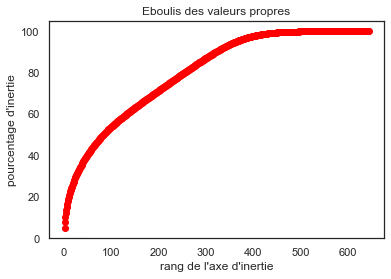

In [24]:
display_scree_plot(pca)

In [19]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

### Train set & test set

In [10]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=77)

### Re-sampling train set with SMOTE

In [17]:
print('Original dataset shape', X_train.shape, y_train.shape)

smote = SMOTE(random_state=random_state)
# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train, y_train)

print('Resample dataset shape', X_train.shape, y_train.shape)

Original dataset shape (249375, 643) (249375,)
Resample dataset shape (464074, 643) (464074,)


## Random Forest Classifier

### Hyperparameters optimization

In [14]:
clf = RandomForestClassifier(random_state=random_state, criterion='gini', max_features='auto')
model = make_model(clf)
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classification',
                 RandomForestClassifier(max_features='auto', random_state=77))])

In [16]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classification', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classification__bootstrap', 'classification__ccp_alpha', 'classification__class_weight', 'classification__criterion', 'classification__max_depth', 'classification__max_features', 'classification__max_leaf_nodes', 'classification__max_samples', 'classification__min_impurity_decrease', 'classification__min_samples_leaf', 'classification__min_samples_split', 'classification__min_weight_fraction_leaf', 'classification__n_estimators', 'classification__n_jobs', 'classification__oob_score', 'classification__random_state', 'classification__verbose', 'classification__warm_start'])

#### GridSearchCV

In [17]:
### Random forest

rf_param_grid = {
    'classification__n_estimators' : np.arange(100, 500, 100),
    'classification__max_depth' : np.arange(2, 11, 3)
                }
# scorers = {'roc_auc':'roc_auc', 'f_beta_score' : ftwo_scorer, 'credit_score': credit_scorer}


In [18]:
grid = GridSearchCV(model, param_grid=rf_param_grid, cv=3, scoring='roc_auc', verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classification',
                                        RandomForestClassifier(max_features='auto',
                                                               random_state=77))]),
             param_grid={'classification__max_depth': array([2, 5, 8]),
                         'classification__n_estimators': array([100, 200, 300, 400])},
             scoring='roc_auc', verbose=1)

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.8373641249926208
{'classification__max_depth': 8, 'classification__n_estimators': 400}


In [20]:
rf_model = grid.best_estimator_
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.7310340955874097

#### Results

Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classification',
                 RandomForestClassifier(max_depth=8, max_features='auto',
                                        n_estimators=400, random_state=77))])
Train score: 0.7618655645435857
Test_score: 0.7310340955874097
ROC AUC train score: 0.845425563810436
ROC AUC test score: 0.6767676347279526
F1 score: 0.2176082220485274
Fbeta score: 0.3359659438113969
              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84    331426
         1.0       0.14      0.53      0.22     24825

    accuracy                           0.74    356251
   macro avg       0.55      0.64      0.53    356251
weighted avg       0.90      0.74      0.80    356251

Confusion matrix
 [[249074  82352]
 [ 11740  13085]]


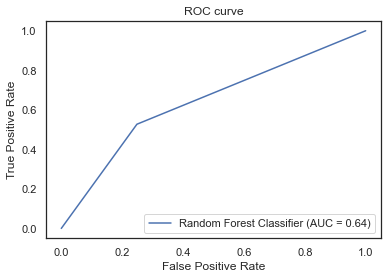

In [21]:
clf_results('Random Forest Classifier', rf_model, X, y, X_train, y_train, X_test, y_test)

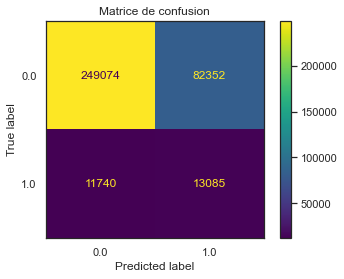

In [22]:
conf_mat_visu(rf_model, X, y)

In [7]:
rf_model = Pipeline([('scaler', StandardScaler()),
                           ('dimension_reduction', PCA(n_components=.99)),
                           ('classifier', RandomForestClassifier(max_depth=8, 
                                                                 criterion='gini',
                                                                 max_features='auto', 
                                                                 n_estimators=400,
                                                                 random_state=77))
                             ])

In [13]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dimension_reduction', PCA(n_components=0.99)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, max_features='auto',
                                        n_estimators=400, random_state=77))])

In [14]:
rf_model.score(X_test, y_test)

0.8799917661589132

Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('dimension_reduction', PCA(n_components=0.99)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, max_features='auto',
                                        n_estimators=400, random_state=77))])
Train score: 0.9136667859005245
Test_score: 0.8799917661589132
ROC AUC train score: 0.9567395732429786
ROC AUC test score: 0.5197526460602423
F1 score: 0.06382885257424002
Fbeta score: 0.0605401531628376
Credit score: -0.019013091641490454
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94    331426
         1.0       0.07      0.06      0.06     24825

    accuracy                           0.88    356251
   macro avg       0.50      0.50      0.50    356251
weighted avg       0.87      0.88      0.88    356251

Confusion matrix
 [[312176  19250]
 [ 23372   1453]]


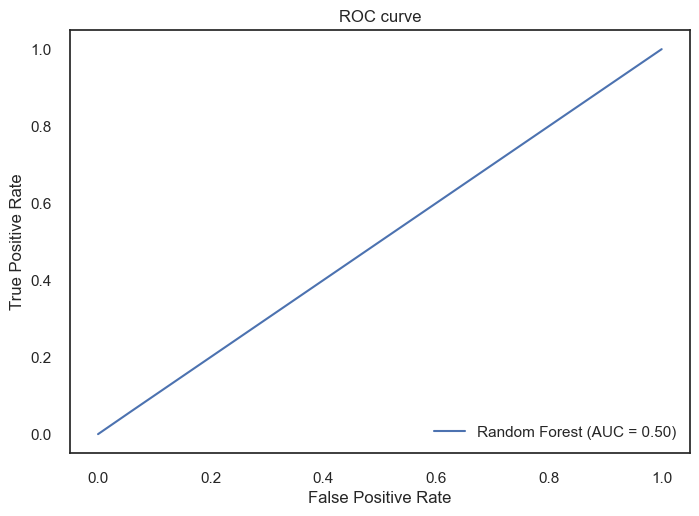

In [16]:
clf_results("Random Forest", rf_model, X, y, X_train, y_train, X_test, y_test)

In [17]:
# Best model to save
import pickle
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

## LightGBM Classifier

In [20]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(nthread=4,
                     n_estimators=10000,
                     learning_rate=0.02,
                     num_leaves=34,
                     colsample_bytree=0.9497036,
                     subsample=0.8715623,
                     max_depth=8,
                     reg_alpha=0.041545473,
                     reg_lambda=0.0735294,
                     min_split_gain=0.0222415,
                     min_child_weight=39.3259775,
                     random_state = 77,
                     silent=-1,
                     verbose=-1)

lgbm_model = Pipeline([('scaler', StandardScaler()),
                           ('dimension_reduction', PCA(n_components=.99)),
                           ('classifier', lgbm_clf)])

In [21]:
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


Pipeline(steps=[('scaler', StandardScaler()),
                ('dimension_reduction', PCA(n_components=0.99)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.02,
                                max_depth=8, min_child_weight=39.3259775,
                                min_split_gain=0.0222415, n_estimators=10000,
                                nthread=4, num_leaves=34, random_state=77,
                                reg_alpha=0.041545473, reg_lambda=0.0735294,
                                silent=-1, subsample=0.8715623, verbose=-1))])

In [22]:
lgbm_model.score(X_test, y_test)

0.9286837082226131

Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('dimension_reduction', PCA(n_components=0.99)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.02,
                                max_depth=8, min_child_weight=39.3259775,
                                min_split_gain=0.0222415, n_estimators=10000,
                                nthread=4, num_leaves=34, random_state=77,
                                reg_alpha=0.041545473, reg_lambda=0.0735294,
                                silent=-1, subsample=0.8715623, verbose=-1))])
Train score: 0.9951774932446118
Test_score: 0.9286837082226131
ROC AUC train score: 0.9999865197578637
ROC AUC test score: 0.7414415958896328
F1 score: 0.7566232932520185
Fbeta score: 0.6663129696632342
Credit score: 0.6157744209466264
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    331426
         1.0       0.98      0.62      0.76

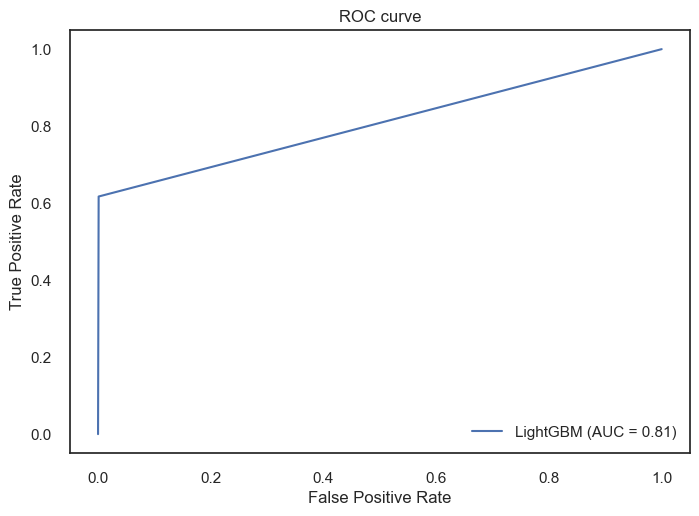

In [23]:
clf_results("LightGBM", lgbm_model, X, y, X_train, y_train, X_test, y_test)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

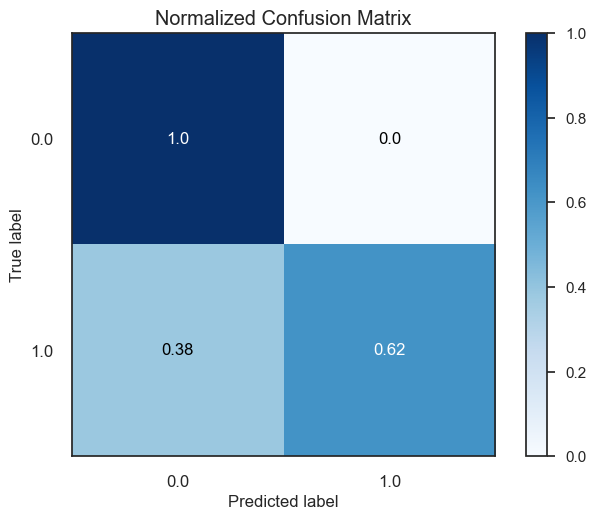

In [25]:
y_pred = lgbm_model.predict(X)
skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=True)

In [24]:
# Best model to save
import pickle
pickle.dump(lgbm_model, open('lgbm_model.pkl', 'wb'))

## SGD Classifier

### Hyperparameters optimisation

In [17]:
clf = SGDClassifier(
    loss='log_loss', 
    penalty='l2', 
    learning_rate='optimal',
    validation_fraction=0.2, 
    random_state=random_state)

model = make_model(clf)
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classification',
                 SGDClassifier(loss='log_loss', random_state=77,
                               validation_fraction=0.2))])

In [18]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classification', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classification__alpha', 'classification__average', 'classification__class_weight', 'classification__early_stopping', 'classification__epsilon', 'classification__eta0', 'classification__fit_intercept', 'classification__l1_ratio', 'classification__learning_rate', 'classification__loss', 'classification__max_iter', 'classification__n_iter_no_change', 'classification__n_jobs', 'classification__penalty', 'classification__power_t', 'classification__random_state', 'classification__shuffle', 'classification__tol', 'classification__validation_fraction', 'classification__verbose', 'classification__warm_start'])

#### Grid Search CV

In [19]:
sgd_params = {
    'classification__alpha' : np.arange(0.0005 , 0.01, 0.0005),
}


In [20]:
grid = GridSearchCV(model, param_grid=sgd_params, cv=3, scoring='roc_auc', verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classification',
                                        SGDClassifier(loss='log_loss',
                                                      random_state=77,
                                                      validation_fraction=0.2))]),
             param_grid={'classification__alpha': array([0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 ,
       0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 ,
       0.0085, 0.009 , 0.0095])},
             scoring='roc_auc', verbose=1)

### Results

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.8144905248721019
{'classification__alpha': 0.009500000000000001}


In [22]:
sgd_model = grid.best_estimator_
sgd_model.fit(X_train, y_train)
sgd_model.score(X_test, y_test)

0.7180002994124032

Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classification',
                 SGDClassifier(alpha=0.009500000000000001, loss='log_loss',
                               random_state=77, validation_fraction=0.2))])
Train score: 0.742549679576964
Test_score: 0.7180002994124032
ROC AUC train score: 0.8157306070563847
ROC AUC test score: 0.7591834539650327
F1 score: 0.24519725621896157
Fbeta score: 0.39306085481943964
Credit score: 0.286896273917422
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83    331426
         1.0       0.15      0.66      0.25     24825

    accuracy                           0.72    356251
   macro avg       0.56      0.69      0.54    356251
weighted avg       0.91      0.72      0.79    356251

Confusion matrix
 [[239468  91958]
 [  8507  16318]]


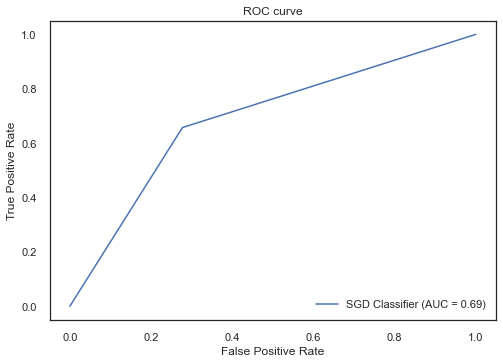

In [23]:
clf_results('SGD Classifier', sgd_model, X, y, X_train, y_train, X_test, y_test)

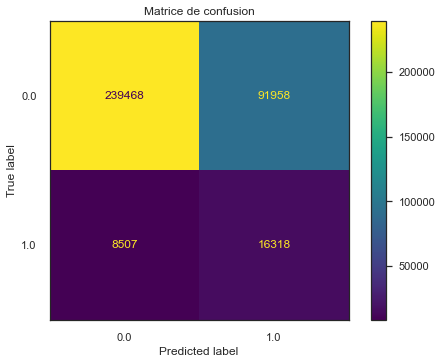

In [24]:
conf_mat_visu(sgd_model, X, y)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

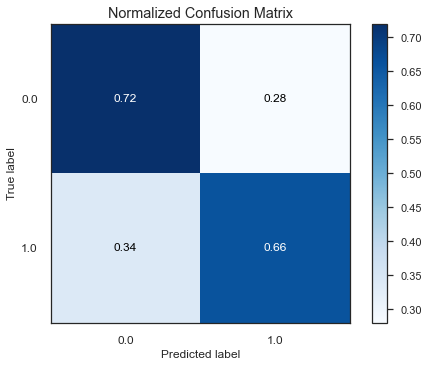

In [25]:
y_pred = sgd_model.predict(X)
skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=True)

In [26]:
# Best model to save
import pickle
pickle.dump(sgd_model, open('sgd_model.pkl', 'wb'))

In [15]:
# Load model
sgd_model = pickle.load(open('sgd_model.pkl', 'rb'))
# Check it worked
# predictions = sgd_model.predict(X_test)
# predictions

In [18]:
# Load model
sgd_model_pipeline = pickle.load(open('sgd_model_with_preprocess.pkl', 'rb'))
# Check it worked
sgd_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dimension_reduction', PCA(n_components=0.99)),
                ('classifier',
                 SGDClassifier(alpha=0.009500000000000001, loss='log_loss',
                               random_state=77, validation_fraction=0.2))])

In [38]:
predictions = sgd_model_pipeline.predict_proba(X_test)[:,1][0]
predictions

0.7487024887489526

In [27]:
# predict probabilities
sgd_probs = sgd_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
sgd_probs_pos = sgd_probs[:, 1]

In [19]:
# predict probabilities
sgd_probs = sgd_model_pipeline.predict_proba(X_test)
# keep probabilities for the positive outcome only
sgd_probs_pos = sgd_probs[:, 1]

In [20]:
sgd_auc = roc_auc_score(y_test, sgd_probs_pos)

In [28]:
# calculate scores
sgd_auc = roc_auc_score(y_test, sgd_probs_pos)

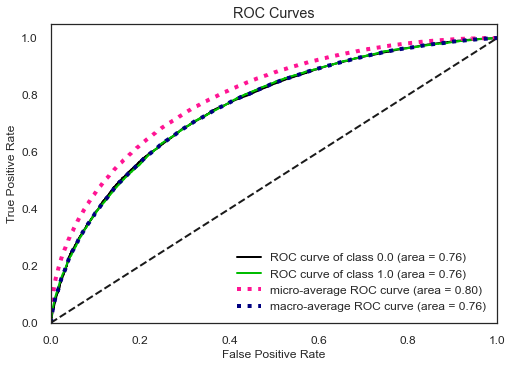

In [30]:
skplt.metrics.plot_roc(y_test, sgd_probs)
plt.show()

In [31]:
# calculate the g-mean for each threshold
from scipy import sqrt
from numpy import argmax
fpr, tpr, thresholds = roc_curve(y_test, sgd_probs_pos)
gmeans = sqrt(tpr * (1-fpr))

In [21]:
# calculate the g-mean for each threshold
from scipy import sqrt
from numpy import argmax
fpr, tpr, thresholds = roc_curve(y_test, sgd_probs_pos)
gmeans = sqrt(tpr * (1-fpr))

## Optimal threshold

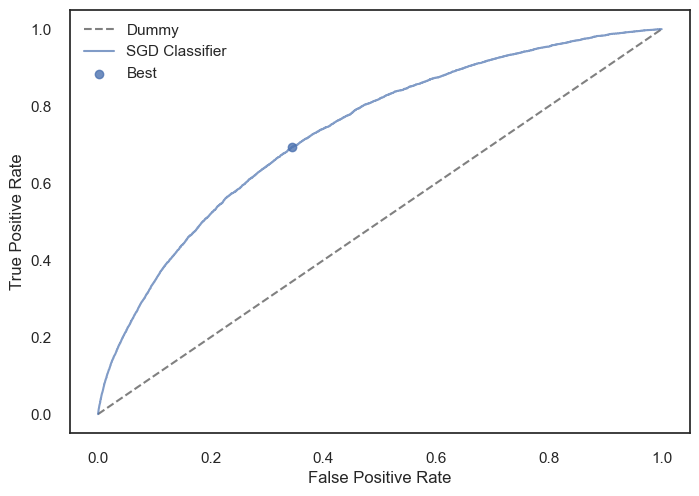

Best Threshold=0.090056, G-Mean=0.675


In [43]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', color='grey', label='Dummy')
plt.plot(fpr, tpr, alpha=0.7, label='SGD Classifier')
# locate the index of the largest g-mean
ix = argmax(gmeans)
plt.scatter(fpr[ix], tpr[ix], marker='o', alpha=0.8, label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

### Youden’s J statistic.

The statistic is calculated as:

J = Sensitivity + Specificity – 1

Given that we have Sensitivity (TPR) and the complement of the specificity (FPR), we can calculate it as:

J = Sensitivity + (1 – FalsePositiveRate) – 1

Which we can restate as:

J = TruePositiveRate – FalsePositiveRate

We can then choose the threshold with the largest J statistic value. For example:

In [39]:
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.090056


In [40]:
y_pred_optim_thr = (sgd_probs_pos>best_thresh)*1

### Evaluation modèle par rapport au seuil de solvabilité

Dans cette partie, on va évaluer les performances du modèle par rapport aux différentes métriques de scoring en utilisant le seuil de solvabilité optimal.


In [42]:
print('ROC AUC score: ', roc_auc_score(y_test, y_pred_optim_thr))
print('Credit score: ', credit_score(y_test, y_pred_optim_thr))
print('fbeta score: ', fbeta_score(y_test, y_pred_optim_thr, beta=2))

ROC AUC score:  0.6747960477948609
Credit score:  0.2370642446907974
fbeta score:  0.37451832181154293


In [37]:
y_pred_optim_thr = (sgd_probs_pos>0.1)*1

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

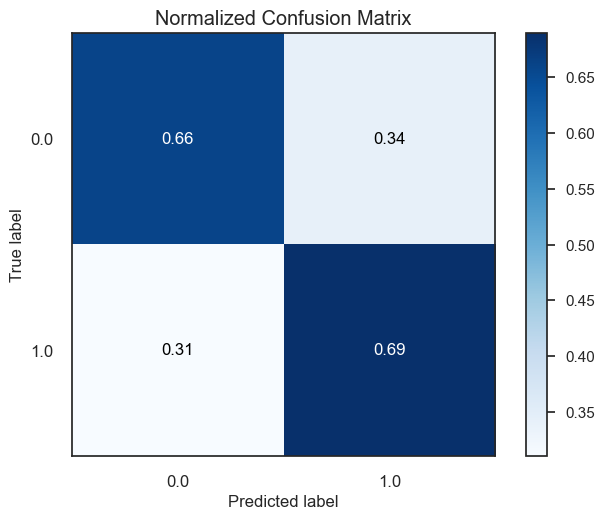

In [41]:
# Ré-afficher la matrice de confusion avec nouvelles prédictions
skplt.metrics.plot_confusion_matrix(y_test, y_pred_optim_thr, normalize=True)

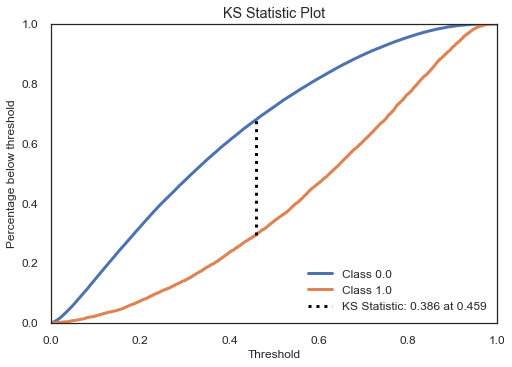

In [37]:
skplt.metrics.plot_ks_statistic(y_test, sgd_probs)
plt.show()

## Feature importance

In [38]:
sgd_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classification',
   SGDClassifier(alpha=0.009500000000000001, loss='log_loss', random_state=77,
                 validation_fraction=0.2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classification': SGDClassifier(alpha=0.009500000000000001, loss='log_loss', random_state=77,
               validation_fraction=0.2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classification__alpha': 0.009500000000000001,
 'classification__average': False,
 'classification__class_weight': None,
 'classification__early_stopping': False,
 'classification__epsilon': 0.1,
 'classification__eta0': 0.0,
 'classification__fit_intercept': True,
 'classification__l1_ratio': 0.15,
 'classification__learning_rate': 'optimal',
 'classification__loss': 'log_loss',
 'classification__max_iter': 1000,
 'classification__n_iter_no_change': 5,
 'classification__n_jobs': None,
 'classification__penalty': 'l2',
 'classif

In [12]:
# creating an explainer for our model, based on the sgd_model without pipeline
shap_model = SGDClassifier(
    alpha=0.009500000000000001,
    epsilon=0.1,
    l1_ratio=0.15,
    learning_rate='optimal',
    loss='log_loss',
    penalty='l2',
    random_state=random_state,
    validation_fraction=0.2
)

In [13]:
shap_model.fit(X_train, y_train)

SGDClassifier(alpha=0.009500000000000001, loss='log_loss', random_state=77,
              validation_fraction=0.2)

In [14]:
explainer = shap.Explainer(shap_model, X_test, feature_names=features_name)

In [15]:
#Saving explainer for dashboard
import pickle
pickle.dump(explainer, open('shap_explainer.pkl', 'wb'))

In [16]:
shap_values = explainer.shap_values(X_test)

In [19]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: -0.8870480032003841


### Global feature importance

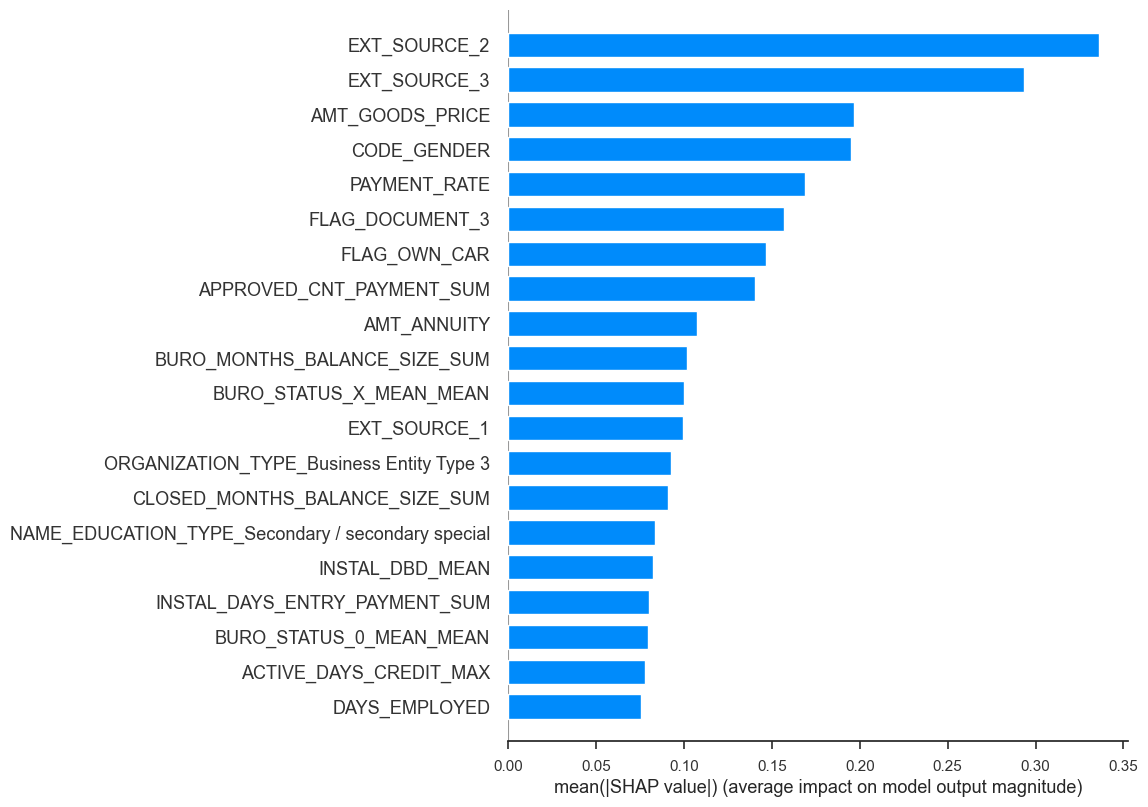

In [17]:
shap.summary_plot(shap_values, X_test, feature_names=features_name, plot_type="bar")

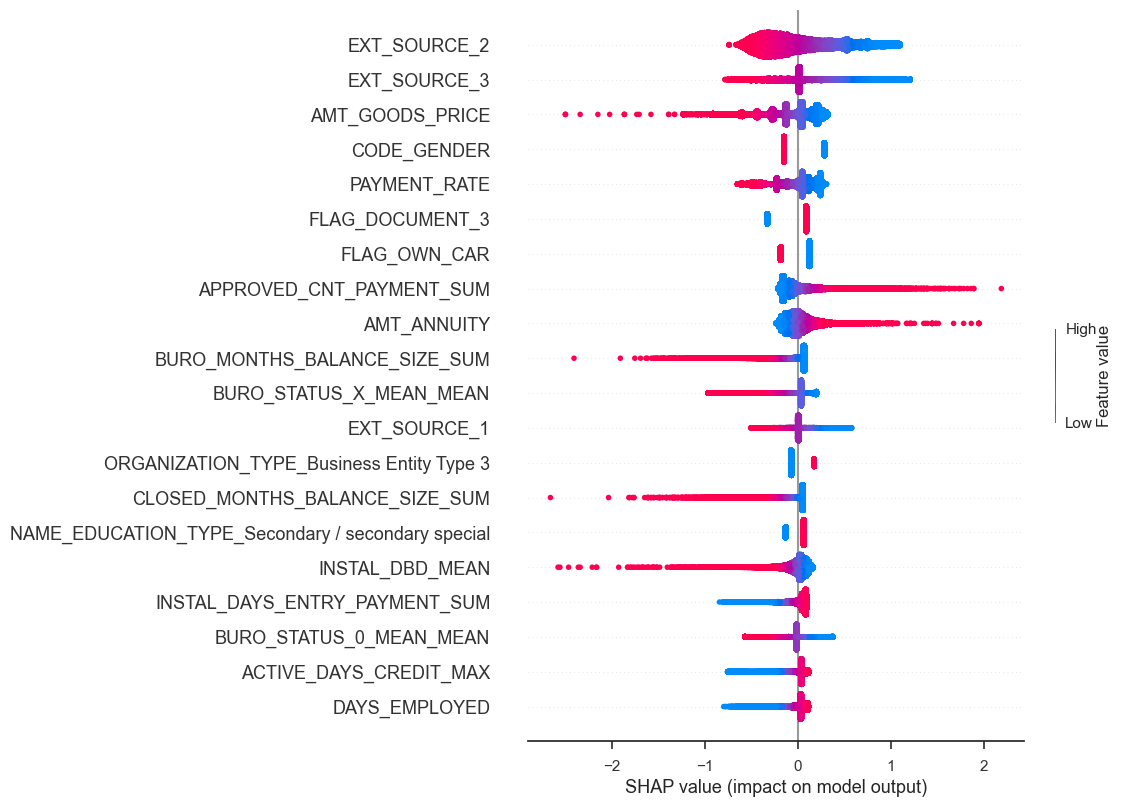

In [18]:
shap.summary_plot(shap_values, X_test, feature_names=features_name)

### Local feature importance

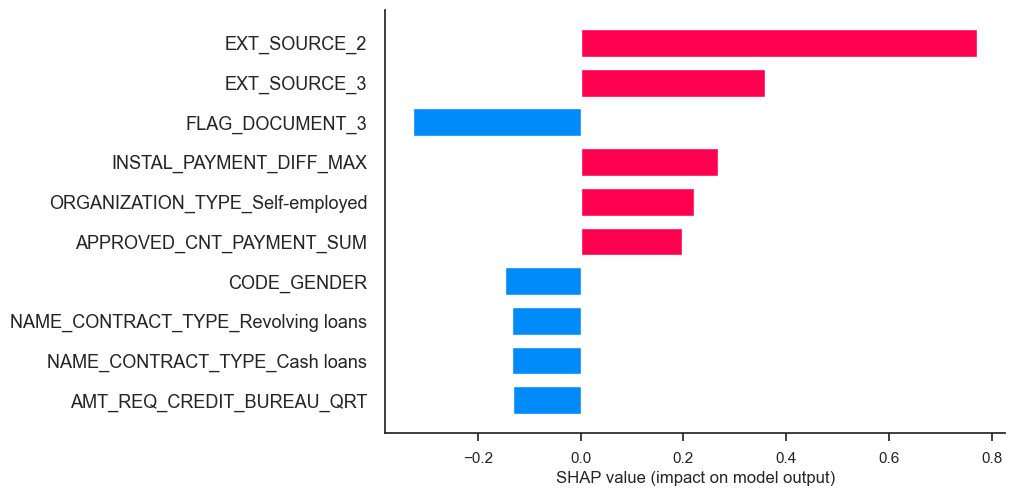

In [20]:
shap.bar_plot(shap_values[0], feature_names=features_name, max_display=10)

## Classification pipeline

In [5]:
from sklearn.pipeline import Pipeline
# Load preprocessor
preprocessor = pickle.load(open('preprocessor_pipeline.pkl','rb'))

In [17]:
model_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('dimension_reduction', PCA(n_components=.99)),
                           ('classifier', SGDClassifier(alpha=0.009500000000000001, 
                                                        epsilon=0.1,
                                                        l1_ratio=0.15,
                                                        learning_rate='optimal',
                                                        loss='log_loss',
                                                        penalty='l2',
                                                        random_state=random_state,
                                                        validation_fraction=0.2))
                             ])

In [18]:
model_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('dimension_reduction', PCA(n_components=0.99)),
                ('classifier',
                 SGDClassifier(alpha=0.009500000000000001, loss='log_loss',
                               random_state=77, validation_fraction=0.2))])

In [30]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dimension_reduction', PCA(n_components=0.99)),
                ('classifier',
                 SGDClassifier(alpha=0.009500000000000001, loss='log_loss',
                               random_state=77, validation_fraction=0.2))])

In [31]:
model_pipeline.score(X_test, y_test)

0.7184119914667465

Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('dimension_reduction', PCA(n_components=0.99)),
                ('classifier',
                 SGDClassifier(alpha=0.009500000000000001, loss='log_loss',
                               random_state=77, validation_fraction=0.2))])
Train score: 0.7420713075931855
Test_score: 0.7184119914667465
ROC AUC train score: 0.8153832038105191
ROC AUC test score: 0.7596260796044303
F1 score: 0.24543194670792245
Fbeta score: 0.39349220721675304
Credit score: 0.28766163141993956
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83    331426
         1.0       0.15      0.66      0.25     24825

    accuracy                           0.72    356251
   macro avg       0.56      0.69      0.54    356251
weighted avg       0.91      0.72      0.79    356251

Confusion matrix
 [[239438  91988]
 [  8485  16340]]


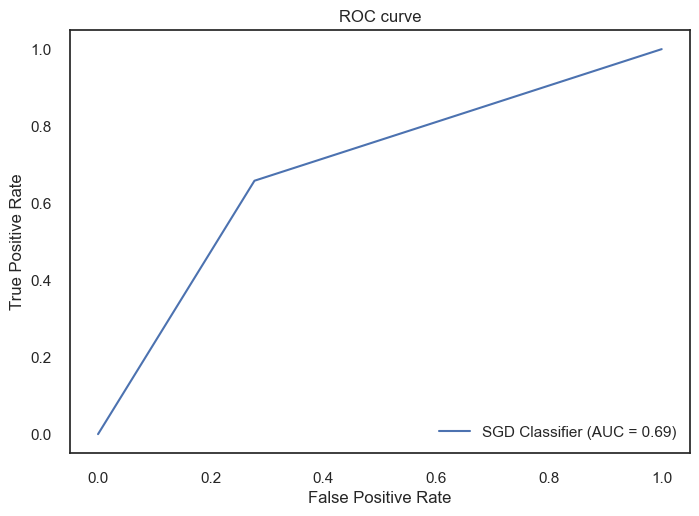

In [32]:
clf_results("SGD Classifier", model_pipeline, X, y, X_train, y_train, X_test, y_test)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

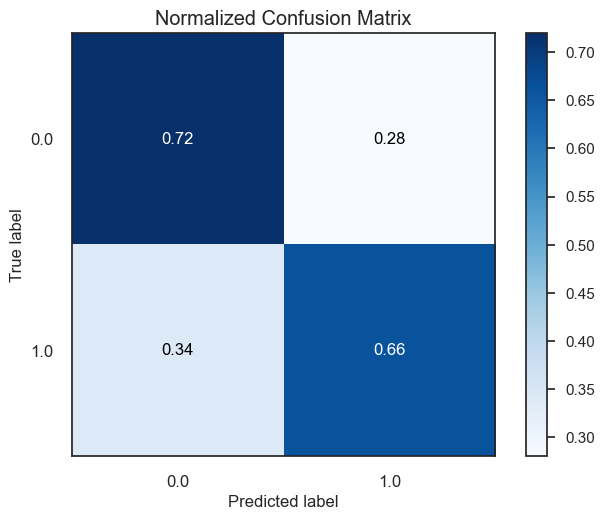

In [35]:
y_pred = model_pipeline.predict(X)
skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=True)

In [36]:
# Serialise pipeline for export
 
pickle.dump(model_pipeline, open('pipeline_sgd_model.pkl', 'wb'))

# import joblib
# joblib.dump(pipeline, 'sgd_model_with_preprocess.joblib')